In [35]:
import pandas as pd

# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datentypen der Spalten anzeigen
print("Train Data Types:")
print(train)

print("\nTest Data Types:")
print(test.head(3))

# Identifizierung der nicht-numerischen Spalten
non_numerical_train = train.select_dtypes(include=['object', 'datetime']).columns
non_numerical_test = test.select_dtypes(include=['object', 'datetime']).columns




Train Data Types:
           date  Unnamed: 0  n_sick  calls  n_duty  n_sby  sby_need  dafted  \
0    2016-04-01           0      73   8154    1700     90         4       0   
1    2016-04-02           1      64   8526    1700     90        70       0   
2    2016-04-03           2      68   8088    1700     90         0       0   
3    2016-04-04           3      71   7044    1700     90         0       0   
4    2016-04-05           4      63   7236    1700     90         0       0   
..          ...         ...     ...    ...     ...    ...       ...     ...   
781  2018-05-22         781      83   8442    1900     90         0       0   
782  2018-05-23         782      80   7422    1900     90         0       0   
783  2018-05-24         783      90   8814    1900     90         0       0   
784  2018-05-25         784     102   7572    1900     90         0       0   
785  2018-05-26         785      89   8136    1900     90         0       0   

     weekday  year  ...  Sick-rat

Train Score: 1.0, Test Score: 1.0
y_pred
[0.04631579 0.04210526 0.03684211 0.03578947 0.03526316 0.03473684
 0.03157895 0.03736842 0.04210526 0.03736842 0.04052632 0.04052632
 0.04105263 0.04157895 0.04736842 0.04105263 0.03789474 0.04210526
 0.04105263 0.04473684 0.04315789 0.04684211 0.04526316 0.04473684
 0.04736842 0.04736842 0.04789474 0.04526316 0.04526316 0.05263158
 0.04473684 0.04526316 0.04315789 0.04684211 0.04736842 0.04263158
 0.04210526 0.03684211 0.03157895 0.03315789 0.03736842 0.03789474
 0.04105263 0.04368421 0.04105263 0.04421053 0.04210526 0.03473684
 0.03473684 0.03842105 0.03684211 0.03263158 0.03421053 0.03947368
 0.03789474 0.03421053 0.03263158 0.03631579 0.03631579 0.03631579
 0.04105263 0.04315789 0.04052632 0.04789474 0.04842105 0.04578947
 0.03947368 0.04157895 0.04052632 0.03368421 0.03210526 0.03578947
 0.03631579 0.03894737 0.03947368 0.03894737 0.03105263 0.03315789
 0.03368421 0.03052632 0.02789474 0.02947368 0.03263158 0.03473684
 0.03947368 0.0415789

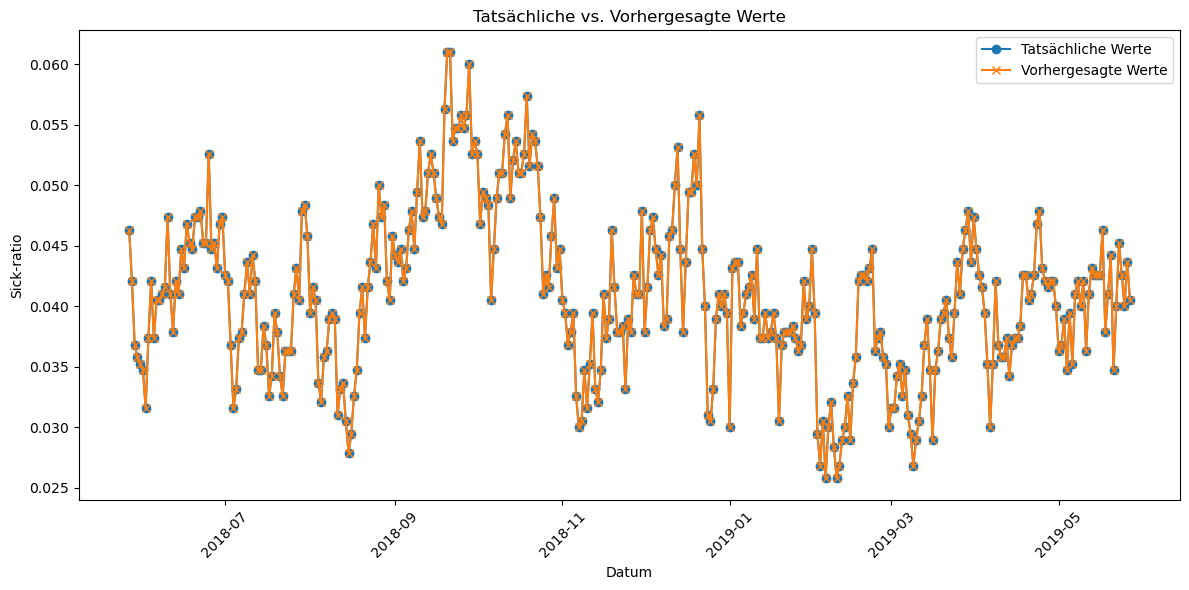

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as sklearn_mape


# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datums-Spalte in Datetime-Format umwandeln
test['date'] = pd.to_datetime(test['date'])
train['date'] = pd.to_datetime(train['date'])

# Features und Zielvariable definieren
X_train = train.drop(['date', 'weekday'], axis=1)  # Unabhängige Variablen (Features)
y_train = train['Sick-ratio']  # Abhängige Variable (Sick-ratio)

X_test = test.drop(['date', 'weekday'], axis=1)  # Unabhängige Variablen (Features)
y_test = test['Sick-ratio']  # Abhängige Variable (Sick-ratio)

# Fehlende Werte behandeln
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)  # Korrektur: X_test statt y_test

# Modell erstellen
model = LinearRegression()

# Modell trainieren
model.fit(X_train, y_train)

# Score auf Trainings- und Testdaten berechnen
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Train Score: {train_score}, Test Score: {test_score}')

# Vorhersagen auf dem Testdatensatz treffen
y_pred = model.predict(X_test)
print('y_pred')
print(y_pred)

# MAPE berechnen
mape = sklearn_mape(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Vergleich von Vorhersagen und tatsächlichen Werten
comparison = pd.DataFrame({'Date': test['date'], 'Actual': y_test, 'Predicted': y_pred})
comparison = comparison.sort_values(by='Date')  # Sortieren nach Datum

print(comparison.head())

# Speichern der Vorhersagen in prediction_df
prediction_df = pd.DataFrame({
    'date': test['date'],  # Datum aus dem Testdatensatz
    'MLR': y_pred         # Vorhersagen des Modells
})

# Speichern der DataFrame als CSV-Datei
prediction_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/prediction_MLR_Calls.csv', index=False)
print(comparison)

# Plotten der Ergebnisse
plt.figure(figsize=(12, 6))
plt.plot(comparison['Date'], comparison['Actual'], label='Tatsächliche Werte', marker='o')
plt.plot(comparison['Date'], comparison['Predicted'], label='Vorhergesagte Werte', marker='x')
plt.xlabel('Datum')
plt.ylabel('Sick-ratio')
plt.title('Tatsächliche vs. Vorhergesagte Werte')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Coefficients: 
 [-2.07199631e-04 -2.50025618e-03  2.76645970e-04 -1.03593927e-03
  1.35795000e-03 -1.26002309e-03  1.34149840e-03  2.81092665e-03
  3.13735864e-07 -6.86021786e-07 -7.32530684e-07]
Mean squared error: 0.00
Coefficient of determination: 0.18
Mean Absolute Percentage Error (MAPE): 0.12%


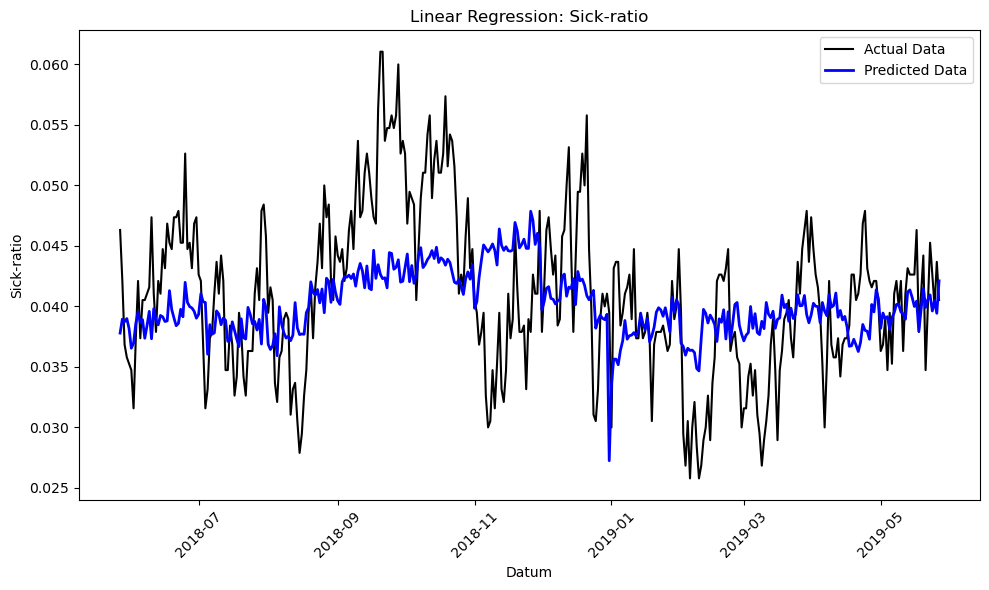

          Date    Actual  Predicted
0   2018-05-27  0.046316   0.046316
1   2018-05-28  0.042105   0.042105
2   2018-05-29  0.036842   0.036842
3   2018-05-30  0.035789   0.035789
4   2018-05-31  0.035263   0.035263
..         ...       ...        ...
361 2019-05-23  0.045263   0.045263
362 2019-05-24  0.042632   0.042632
363 2019-05-25  0.040000   0.040000
364 2019-05-26  0.043684   0.043684
365 2019-05-27  0.040526   0.040526

[366 rows x 3 columns]


In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datums-Spalte in Datetime-Format umwandeln
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])


# Auswahl mehrerer Features
#features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls']  # Hier kannst du beliebige Features hinzufügen
features =  ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
# Extrahiere die Werte für das Training und Testen
X_train = train[features].values
X_test = test[features].values

X_train = train[features].values
X_test = test[features].values

# Fehlende Werte im DataFrame behandeln
train = train.fillna(0)
test = test.fillna(0)  

# Zielvariable (Anzahl der Anrufe)
y_train = train['Sick-ratio'].values
y_test = test['Sick-ratio'].values

# Lineares Regressionsmodell erstellen
regr = LinearRegression()

# Modell mit den Trainingsdaten trainieren
regr.fit(X_train, y_train)

# Vorhersagen mit den Testdaten machen
y_pred = regr.predict(X_test)

# Die Koeffizienten anzeigen
print("Coefficients: \n", regr.coef_)
# Mean Squared Error anzeigen
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Bestimmtheitsmaß anzeigen (R^2-Wert)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# MAPE berechnen
mape = sklearn_mape(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Ergebnisse plotten (nur ein Beispielplot)
plt.figure(figsize=(10, 6))
plt.plot(test['date'], y_test, color="black", label="Actual Data")
plt.plot(test['date'], y_pred, color="blue", linewidth=2, label="Predicted Data")

plt.xlabel('Datum')
plt.ylabel('Sick-ratio')
plt.title('Linear Regression: Sick-ratio')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
prediction_df = pd.DataFrame({
    'date': test['date'],  # Datum aus dem Testdatensatz
    'MLR': y_pred         # Vorhersagen des Modells
})

prediction_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/prediction_MLR_Sickratio.csv', index=False)
print(comparison)